In [1]:
#@title Dependencies

print("Load dependencies - START")
!pip install qrcode > /dev/null 2>&1
!pip install memory_profiler > /dev/null 2>&1

import time
import random
import matplotlib.pyplot as plt
import numpy as np
import qrcode
from PIL import Image
import tracemalloc
import matplotlib.ticker as ticker

print("Load dependencies - END")

Load dependencies - START
Load dependencies - END


In [2]:
#@title Utils

# Definir la función de búsqueda binaria
def busqueda_binaria(arr, x):
    l, r = 0, len(arr) - 1
    while l <= r:
        mid = l + (r - l) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            l = mid + 1
        else:
            r = mid - 1
    return -1

# Función para medir la memoria utilizada por la búsqueda binaria
def medir_memoria_busqueda_binaria(arr, valor):
    tracemalloc.start()
    busqueda_binaria(arr, valor)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak - current  # Queremos la memoria adicional utilizada

<ipython-input-3-346274db5215>:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


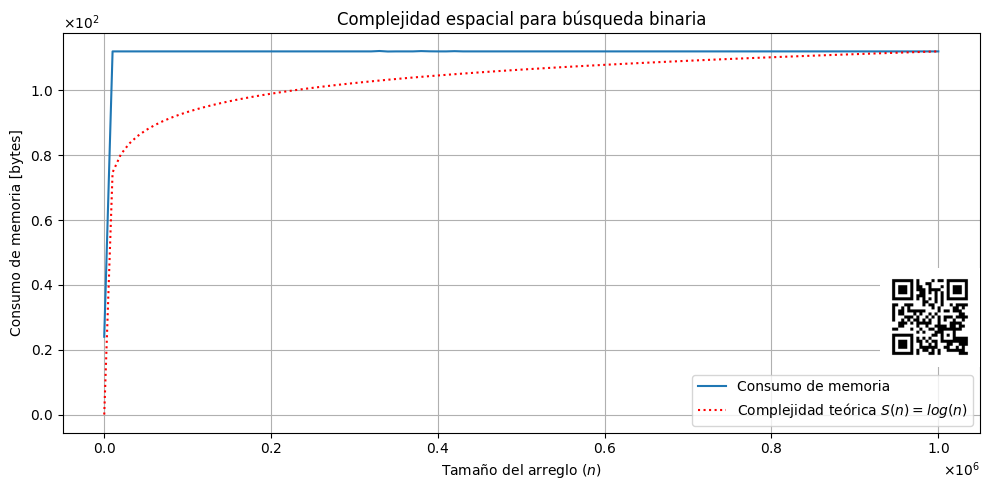

In [3]:
# Lista de tamaños de lista para probar
tamanos_lista = np.arange(1, 1000100, 10000)

# Inicializar arrays para el uso de memoria
memoria_busqueda = np.zeros(len(tamanos_lista))

average = 1000

# Medir el uso de memoria 10 veces para cada tamaño de lista
for i, n in enumerate(tamanos_lista):
    memoria_busqueda_n = np.zeros(average)
    valor_buscar = -1  # Un valor que no está en el arreglo para garantizar la búsqueda completa
    for j in range(average):
        lista = np.arange(n)
        memoria_busqueda_n[j] = medir_memoria_busqueda_binaria(lista, valor_buscar)
    memoria_busqueda[i] = np.mean(memoria_busqueda_n)

# Generar el código QR
qr_data = "https://bit.ly/3RvkQYN"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path)

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

# Graficar los resultados
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Gráfica: Memoria utilizada por la búsqueda binaria
ax1.plot(tamanos_lista, memoria_busqueda, label='Consumo de memoria')

# Agregar la línea S(n) = O(log(n))
log_n = np.log(tamanos_lista)
# Escalar log_n para ajustarse a la escala de memoria_busqueda
log_n_scaled = log_n * (memoria_busqueda[-1] / log_n[-1])
ax1.plot(tamanos_lista, log_n_scaled, label='Complejidad teórica $S(n)=log(n)$', linestyle='dotted', color='red')

ax1.set_xlabel('Tamaño del arreglo ($n$)')
ax1.set_ylabel('Consumo de memoria [bytes]')
ax1.set_title('Complejidad espacial para búsqueda binaria')
ax1.legend(loc='lower right')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Insertar la imagen del código QR en la gráfica
qr_position = [0.885, 0.23, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('complejidad_espacial_logaritmico.png', dpi=300)

<ipython-input-4-312f69db0391>:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


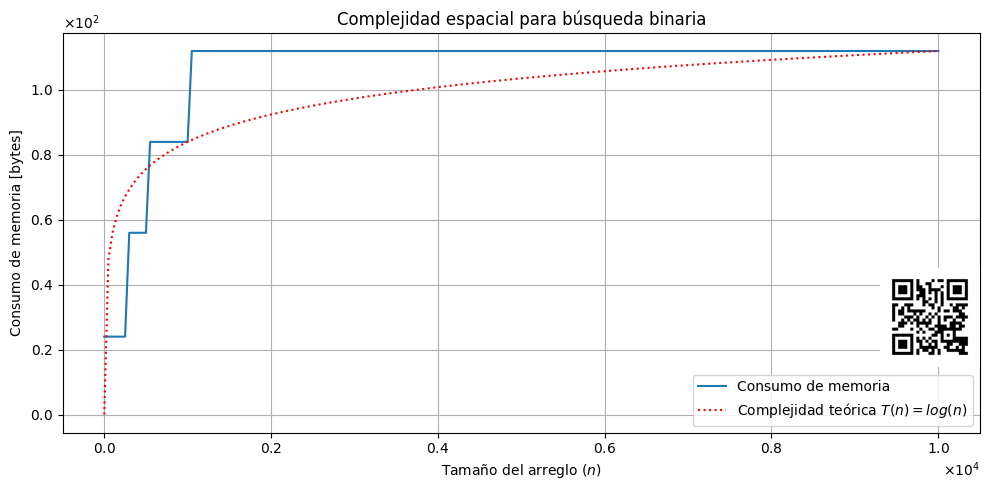

In [4]:
# Lista de tamaños de lista para probar
tamanos_lista = np.arange(1, 10010, 50)

# Inicializar arrays para el uso de memoria
memoria_busqueda = np.zeros(len(tamanos_lista))

average = 500

# Medir el uso de memoria 10 veces para cada tamaño de lista
for i, n in enumerate(tamanos_lista):
    memoria_busqueda_n = np.zeros(average)
    valor_buscar = -1  # Un valor que no está en el arreglo para garantizar la búsqueda completa
    for j in range(average):
        lista = np.arange(n)
        memoria_busqueda_n[j] = medir_memoria_busqueda_binaria(lista, valor_buscar)
    memoria_busqueda[i] = np.mean(memoria_busqueda_n)

# Generar el código QR
qr_data = "https://bit.ly/3RvkQYN"
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(qr_data)
qr.make(fit=True)
qr_img = qr.make_image(fill_color='black', back_color='white')

# Guardar la imagen del código QR
qr_img_path = "codigo_qr.png"
qr_img.save(qr_img_path)

# Cargar la imagen del código QR con PIL
qr_img_pil = Image.open(qr_img_path)

# Convertir la imagen de PIL a un formato que matplotlib puede manejar
qr_img_np = np.array(qr_img_pil)

# Graficar los resultados
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# Gráfica: Memoria utilizada por la búsqueda binaria
ax1.plot(tamanos_lista, memoria_busqueda, label='Consumo de memoria')

# Agregar la línea S(n) = O(log(n))
log_n = np.log(tamanos_lista)
# Escalar log_n para ajustarse a la escala de memoria_busqueda
log_n_scaled = log_n * (memoria_busqueda[-1] / log_n[-1])
ax1.plot(tamanos_lista, log_n_scaled, label='Complejidad teórica $T(n)=log(n)$', linestyle='dotted', color='red')

ax1.set_xlabel('Tamaño del arreglo ($n$)')
ax1.set_ylabel('Consumo de memoria [bytes]')
ax1.set_title('Complejidad espacial para búsqueda binaria')
ax1.legend(loc='lower right')
ax1.grid(True)

# Formatear los ejes x e y en notación científica
ax1.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Insertar la imagen del código QR en la gráfica
qr_position = [0.885, 0.23, 0.1, 0.25]
ax_inset = fig.add_axes(qr_position)
ax_inset.imshow(qr_img_np, cmap='gray')
ax_inset.axis('off')

plt.tight_layout()
plt.show()

fig.savefig('complejidad_espacial_logaritmico_2.png', dpi=300)